# Assignment 6
## Gal Dali

### Question 1

#### Part A

$ \dot y = \alpha y^2 - \beta y^3 $

#### Explicit Euler: $ y_{i+1} = y_i + h f(t_i, y_i) $

$ y_{i+1} = y_i + h (\alpha y_i^2 - \beta y_i^3) $  


#### Semi-Implicit Euler: $ y_{i+1} = y_i + h \cdot B_i^{-1} \cdot f_i $

$ f_i = f(t_i, y_i) = \alpha y_i^2 - \beta y_i^3 $  
$ B_i = 1 - \frac{\partial f}{\partial y} = 1 - (\alpha \cdot 2y_i - \beta \cdot 3y_i^2) $  
$ B_i^{-1} = \frac{1}{1 - (\alpha \cdot 2y_i - \beta \cdot 3y_i^2)} = \frac{1}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} $  
$ y_{i+1} = y_i + h \cdot \frac{1}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} \cdot (\alpha y_i^2 - \beta y_i^3) = y_i + h \cdot \frac{\alpha y_i^2 - \beta y_i^3}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2} = y_i \cdot (\frac{1 - 2 \cdot h \cdot \alpha \cdot y + 3 \cdot h \cdot \beta \cdot y^2 - h \cdot \alpha \cdot y^2 + h \cdot \beta \cdot y^3}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2}) = y_i \cdot (\frac{1 + h \cdot \beta \cdot y^3 + y^2 \cdot (h \cdot (3 \beta - \alpha)) - 2h \alpha y}{1 - h \cdot 2\alpha y_i + h \cdot 3\beta y_i^2}) $

#### Part B

$ \alpha = \beta = 1, y(0) = 0.99, h = 3 $

In [32]:
alpha = beta = 1
y0 = 0.99
h = 3
num_of_iterations = 24 # question asked for 3 but I will show 24 steps

[0.99, 1.0194029999999998, 0.9589132272307088, 1.0722528867245873, 0.8230397645383711, 1.1826554107851357, 0.41622938698428524, 0.7196387385671981, 1.1552191364856355, 0.5337847702334599, 0.9322955449642665, 1.1088366006609327, 0.7073867237665297, 1.1466542424644757, 0.568184230306978, 0.9863977854243917, 1.026101857758123, 0.9436550924796809, 1.094177966169187, 0.7559212003980147, 1.1743334250682886, 0.45308519208388365, 0.7899073657084159, 1.1831715614527203]
[0.99, 0.9975763353861218, 0.9994407976633206, 0.999872587014017, 0.9999710542663915, 0.9999934285027194, 0.9999985083122314, 0.9999996614081511, 0.999999923145083, 0.9999999825551981, 0.9999999960403185, 0.999999999101218, 0.9999999997959914, 0.9999999999536935, 0.9999999999894892, 0.9999999999976142, 0.9999999999994584, 0.9999999999998771, 0.9999999999999721, 0.9999999999999937, 0.9999999999999986, 0.9999999999999997, 0.9999999999999999, 1.0]

We can see that the Explicit-Euler solution does not converges to 1 (at least not af

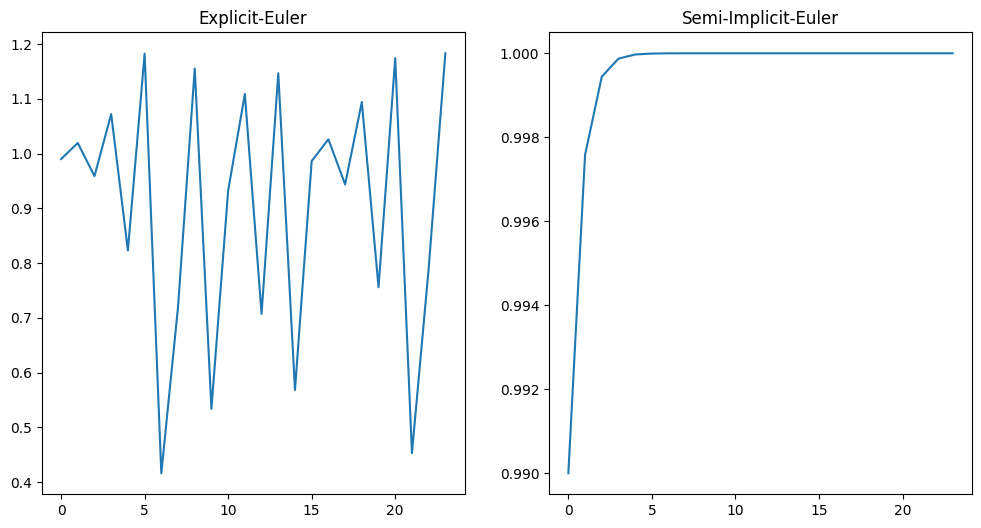

In [36]:
def explicit_euler(f, delta, y_0, num_of_steps):
    y = [y_0]
    for i in range(1, num_of_steps):
        y.append(y[i - 1] + delta * f(y[i - 1]))
    return y


def semi_implicit_euler(f, b, delta, y_0, num_of_steps):
    y = [y_0]
    for i in range(1, num_of_steps):
        y.append(y[i - 1] + delta * (1 / b) * f(y[i - 1]))
    return y

def flame_equation_derivative(area_const, volume_const):
    return lambda y: area_const * y ** 2 - volume_const * y ** 3

# call explicit euler
explicit_euler_result = explicit_euler(flame_equation_derivative(alpha, beta), h, y0, num_of_iterations)

# call semi implicit euler
b_term = 1 - h * (2 * alpha * y0 - 3 * beta * y0 ** 2)
semi_implicit_euler_result = semi_implicit_euler(flame_equation_derivative(alpha, beta), b_term, h, y0, num_of_iterations)

print(explicit_euler_result)
print(semi_implicit_euler_result)

import matplotlib.pyplot as plt

print("\nWe can see that the Explicit-Euler solution does not converges to 1 (at least not after a reasonable number of steps) while the Semi-Implicit-Euler solution converges to 1 after only 24 iterations.")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(explicit_euler_result)
ax1.set_title("Explicit-Euler")

ax2.plot(semi_implicit_euler_result)
ax2.set_title("Semi-Implicit-Euler")

plt.show()